## Machine Learning Exercises using Keras

Keras is our recommended library for deep learning in Python, especially for beginners. Its minimalistic, modular approach makes it a breeze to get deep neural networks up and running. You can read more about it here:

[The Keras library for deep learning in Python.](https://elitedatascience.com/python-deep-learning-libraries#keras)

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# Let's see the shapes of our input.
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

My label is 5


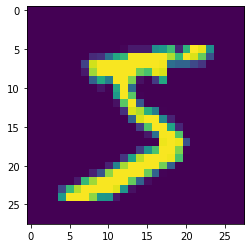

My label is 0


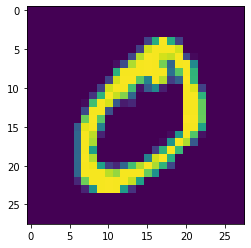

My label is 4


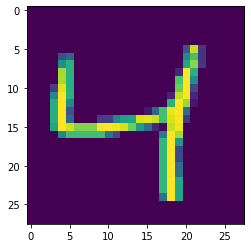

In [15]:
from matplotlib import pyplot as plt
## Use the function plt.imshow to show the first three images in X_train.
## After the image is loaded onto plt.imshow, you'll have to actually render it with plt.show().
for i in range(3):
    plt.imshow(x_train[i])
    print("My label is", y_train[i])
    plt.show()

## Let's preprocess the input data.

In [14]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [16]:
### Model / data parameters
# TODO
num_classes = 10#
input_shape = (28, 28, 1)#

In [23]:
x_train.max()

255

In [24]:
# Convert x_train and x_test to float32 and scale the images to the [0, 1] range
#
x_train = x_train.astype('float32') / 255 ##
x_test = x_test.astype('float32') / 255 ##

In [25]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [27]:
# Let's see the new shapes of the test and train samples
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
### Let's see what the labels look like... Print the top 5 labels below.
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

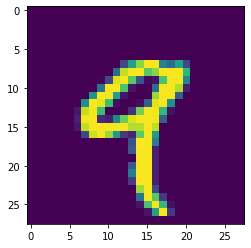

In [39]:
plt.imshow(x_train[4])

As you can probably imagine, even though the labels are from 0-9, there's no dependencies between
the numbers. If a label is 4, the error is the same if you predict 3 or 9.

## One-Hot Encoding

In [ ]:
# To avoid this linear dependency, let's convert our array to a categorical using 
# keras.utils.to_categorical

In [40]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)##

In [42]:
# What do they look like now? This type of categorization is called One-Hot Encoding.
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Step 7:  Define model architecture.
Now we're ready to define our model architecture. In actual R&D work, researchers will spend a considerable amount of time studying model architectures.

To keep this tutorial moving along, we're not going to discuss the theory or math here. This alone is a rich and meaty field, and we recommend the CS231n class mentioned earlier for those who want to learn more.

Plus, when you're just starting out, you can just replicate proven architectures from academic papers or use existing examples. Here's a list of [example implementations in Keras](https://github.com/fchollet/keras/tree/master/examples).

In [ ]:
# The model we're going to build starts with keras.Sequential.

# Then, we'll add an Input of shape input_shape

# A dense layer equal to the number of classes, and I'll let you guess the activation function.

#   Hint: look up activation functions for categorical data.

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        ## FILL IN WITH THE LAYERS YOU THINK WOULD BE GOOD.
        layers.Dense(num_classes, activation= "TODO"),
    ]
)

# Print the summary of the model with model.summary()

In [55]:
# The model we're going to build starts with keras.Sequential.
# Then, we'll add an Input of shape input_shape
# A Conv2D with 32 layers, kernel_size of 3, 3, and activation = 'relu'
# A MaxPooling2D with pool size 2, 2
# A Conv2D with 54 layers, kernel_size of 3, 3, and activation = 'relu'
# A MaxPooling2D with pool size 2, 2
# A flattener
# A Dropout with probability 0.5
# A dense layer equal to the number of classes, and I'll let you guess the activation function.
#   Hint: look up activation functions for categorical data.

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### And now we train the model!

In [56]:
# What batch size and number of epochs should we choose?

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split= 0.1 )

Epoch 1/15
422/422 [==============================] - 31s 72ms/step - loss: 0.7579 - accuracy: 0.7605 - val_loss: 0.0882 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 26s 62ms/step - loss: 0.1287 - accuracy: 0.9614 - val_loss: 0.0562 - val_accuracy: 0.9865
Epoch 3/15
422/422 [==============================] - 23s 54ms/step - loss: 0.0958 - accuracy: 0.9716 - val_loss: 0.0483 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0741 - accuracy: 0.9767 - val_loss: 0.0423 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 24s 58ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.0368 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 27s 63ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0357 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 27s 65ms/step - loss: 0.0543 - accuracy: 0.9824 - val_loss: 0.0354 - val_accuracy:

In [57]:
# Print the test loss and the accuracy of your model.
# A good model can achieve test loss of ~0.02, and test accuracy of 99%.
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0263445433229208
Test accuracy: 0.9908999800682068


In [ ]:
# Congratulations on your model! If you'd like to now classify movies using
# the IMDB movie review sentiment, do the following tutorial:

# https://keras.io/examples/nlp/text_classification_from_scratch/